# Suicide Rates Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## 데이터 불러오기

In [2]:
data = pd.read_csv("master.csv")
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## 속성

**suicides/100k pop** : 10만명 당 자살 비율   
**HDI for year** : 연도별 HDI(Human Development Index) - 여러 가지 인간의 삶과 관련된 지표를 조사해 각국의 인간 발전 정도와 선진화 정도를 평가한 지수.    
- ~ 2009년 : HDI가 0.900이상이 선진국    
- 2015년 ~ : 49위까지 선진국

**gdp_for_year \(\$\)** : 국내총생산. 일정 기간 동안 한 국가에서 생산된 재화와 용역의 시장 가치를 합한 것   
**gdp_per_capita \(\$\)** : 인당 국민소득   

**generation** : 세대

### column명 바꿔주기

In [3]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
data.rename(columns = {"suicides/100k pop": "suicides100kpop","HDI for year":"HDI_for_year"," gdp_for_year ($) ":"gdp_for_year","gdp_per_capita ($)":"gdp_per_capita"}, inplace = True)
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides100kpop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

## feature 살펴보기

In [5]:
data.describe()

,year,suicides_no,population,suicides100kpop,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27820 non-null  object 
 1   year             27820 non-null  int64  
 2   sex              27820 non-null  object 
 3   age              27820 non-null  object 
 4   suicides_no      27820 non-null  int64  
 5   population       27820 non-null  int64  
 6   suicides100kpop  27820 non-null  float64
 7   country-year     27820 non-null  object 
 8   HDI_for_year     8364 non-null   float64
 9   gdp_for_year     27820 non-null  object 
 10  gdp_per_capita   27820 non-null  int64  
 11  generation       27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
data.isnull().sum()

country                0
year                   0
sex                    0
age                    0
suicides_no            0
population             0
suicides100kpop        0
country-year           0
HDI_for_year       19456
gdp_for_year           0
gdp_per_capita         0
generation             0
dtype: int64

HDI_for_year에 27820개의 데이터 중 19456개의 데이터가 null값 => 대부분이 null이므로 데이터 분석에 큰 영향을 주지 못하니 컬럼 삭제해도 될듯

In [8]:
data = data.drop('HDI_for_year',axis = 1)
data.shape

(27820, 11)

In [9]:
data.year.nunique()

32

In [10]:
data.country.nunique()

101

In [11]:
data.country.value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Luxembourg                372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Macau                      12
Dominica                   12
Mongolia                   10
Name: country, Length: 101, dtype: int64

### country count

<AxesSubplot:xlabel='count', ylabel='country'>

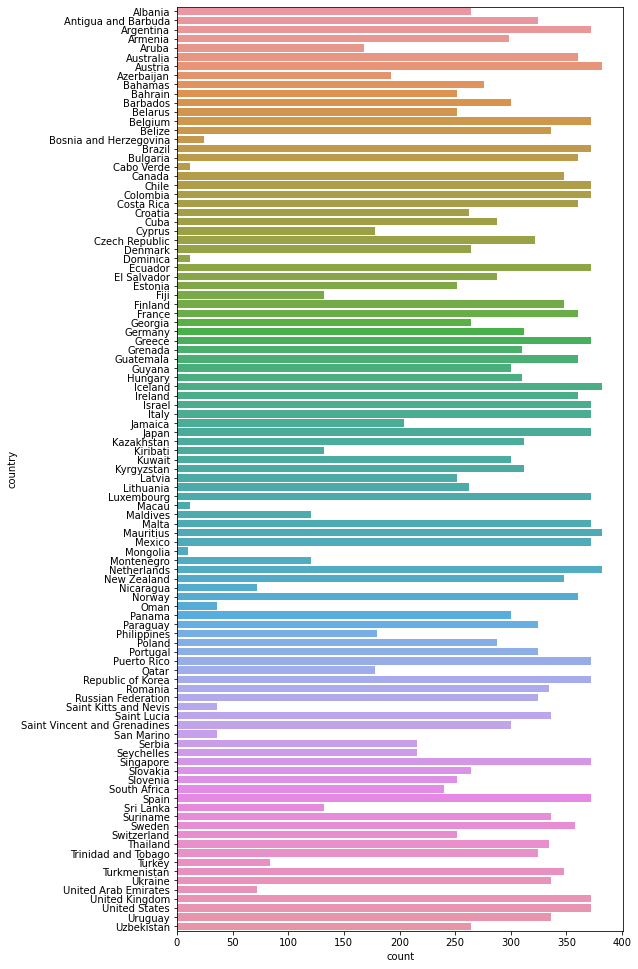

In [12]:
plt.figure(figsize=(8,17))
sns.countplot(y='country',data=data)

나라 별 데이터 수

### Gender

<AxesSubplot:xlabel='sex', ylabel='count'>

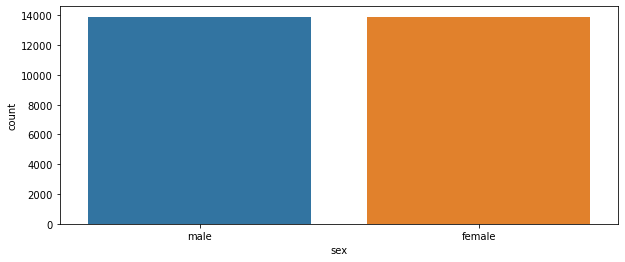

In [13]:
plt.figure(figsize=(10,4))

sns.countplot('sex',data = data)

성별 비율은 똑같았다.

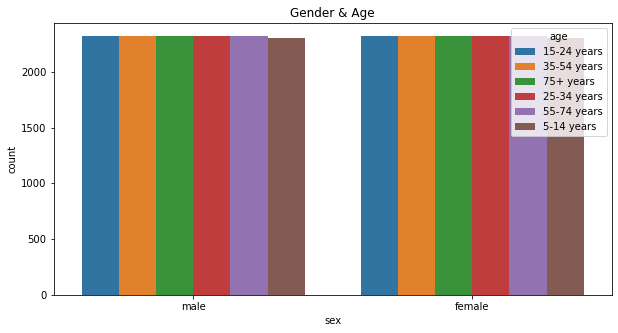

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data.sex, hue=data.age)
plt.title('Gender & Age')
plt.show()

성별 별 나이대 수도 찍어봤는데 거의 비슷하다.

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

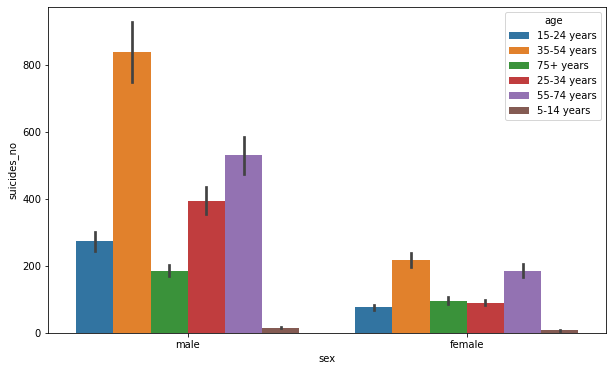

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age', data = data)

성별과 나이 기준 자살 평균   
남자가 여자보다 대체적으로 자살률이 높았고 남녀 둘 다 35-54세, 55-74세의 자살률이 높게 나왔다.

<AxesSubplot:xlabel='generation', ylabel='count'>

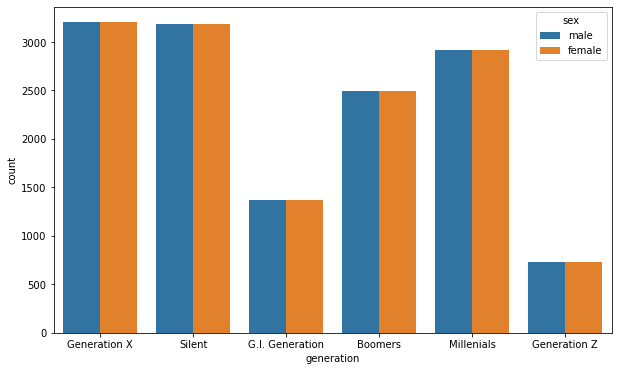

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data.generation,hue=data.sex)

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

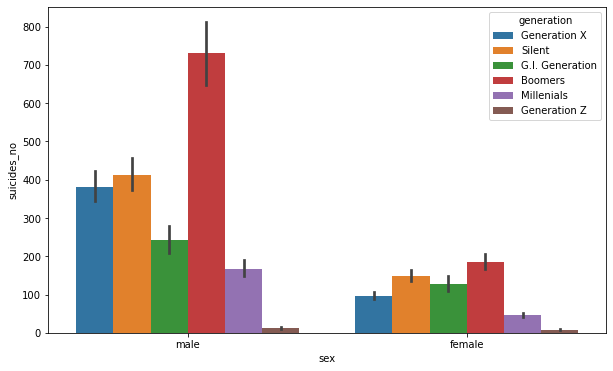

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = data)

### Year

세대 별 남녀 자살 추이

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

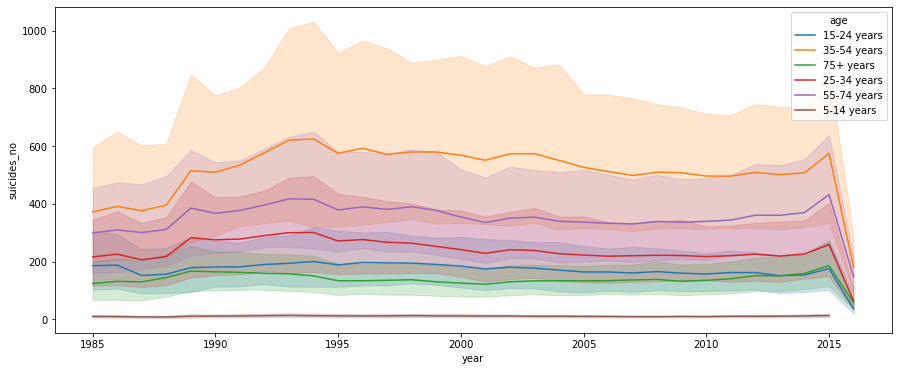

In [38]:
plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='suicides_no',hue = 'age', data=data)

나이에 따른 연도 별 자살 수 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1986'),
  Text(2, 0, '1987'),
  Text(3, 0, '1988'),
  Text(4, 0, '1989'),
  Text(5, 0, '1990'),
  Text(6, 0, '1991'),
  Text(7, 0, '1992'),
  Text(8, 0, '1993'),
  Text(9, 0, '1994'),
  Text(10, 0, '1995'),
  Text(11, 0, '1996'),
  Text(12, 0, '1997'),
  Text(13, 0, '1998'),
  Text(14, 0, '1999'),
  Text(15, 0, '2000'),
  Text(16, 0, '2001'),
  Text(17, 0, '2002'),
  Text(18, 0, '2003'),
  Text(19, 0, '2004'),
  Text(20, 0, '2005'),
  Text(21, 0, '2006'),
  Text(22, 0, '2007'),
  Text(23, 0, '2008'),
  Text(24, 0, '2009'),
  Text(25, 0, '2010'),
  Text(26, 0, '2011'),
  Text(27, 0, '2012'),
  Text(28, 0, '2013'),
  Text(29, 0, '2014'),
  Text(30, 0, '2015'),
  Text(31, 0, '2016')])

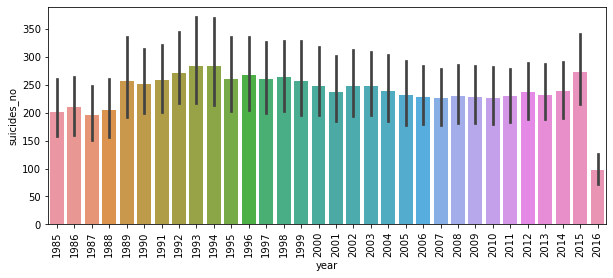

In [52]:
plt.figure(figsize=(10,4))
sns.barplot(x="year", y="suicides_no", data=data,
            label="Year Suicides")
plt.xticks(rotation=90)

연도 별 자살률

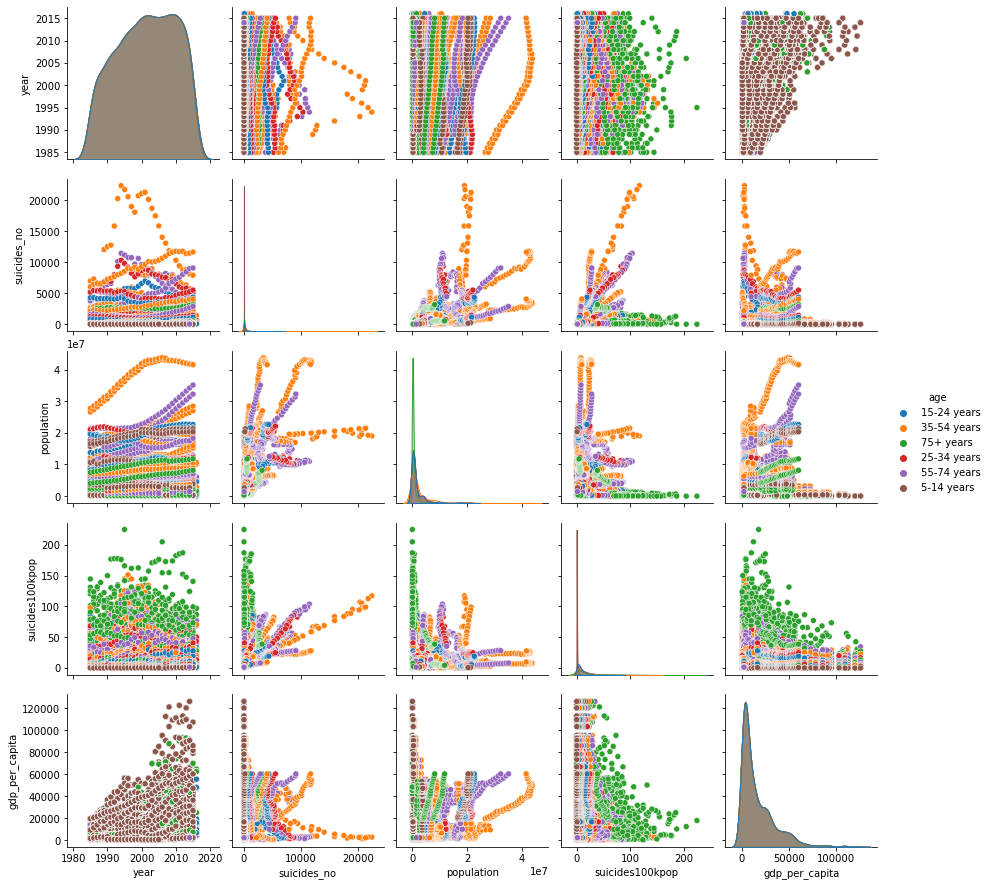

In [55]:
sns.pairplot(data,hue='age')

### 자살 수가 많은 국가

In [64]:
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum())
suic_sum = suic_sum.reset_index().sort_values(by = 'suicides_no',ascending=False)

top_suic = suic_sum.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Russian Federation'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Ukraine'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Republic of Korea'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'United Kingdom')])

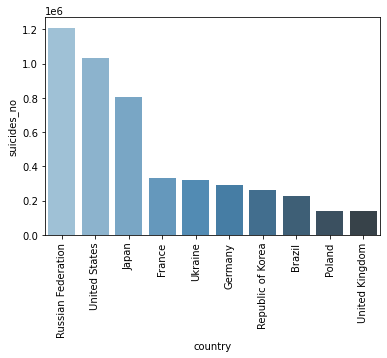

In [66]:
sns.barplot(y='suicides_no',x='country',data=top_suic,palette="Blues_d")
plt.xticks(rotation=90)